In [55]:
%matplotlib inline

import math
import random

import matplotlib.pyplot as plt
import numpy as np
import numba

In [56]:
L = 100 # system size in one direction
J = 1 # lattice bond energy
temperature = 2 # temperature to simulate
beta = 1/temperature # inverse temperature, setting Boltzmann constant to 1

In [57]:
def calculate_energy(lattice):
    """Calculate the energy of a lattice using the Ising model Hamiltonian."""
    energy = 0
    for y in range(L):
        for x in range(L):
            center = lattice[y][x]
            neighbours = [(y, (x-1)%L) ,(y, (x+1)%L), ((y-1)%L, x), ((y+1)%L, x)]
            for n in neighbours:
                if lattice[n] == center:
                    energy += J
        
    return energy

In [58]:
def exponents_init():
    exponents = {}
    for x in range(2, 5, 2):
        exponents[2*J*x] = math.exp(-beta * 2 * J * x)
    
    return exponents

exponents_init()


{4: 0.1353352832366127, 8: 0.01831563888873418}

sweep 0
sweep 100
sweep 200


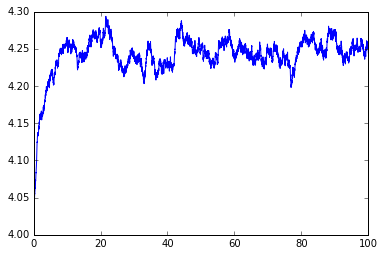

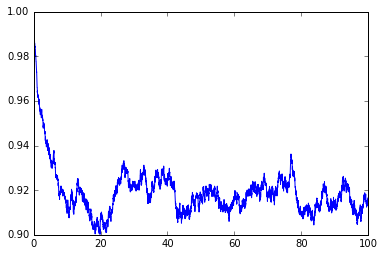

In [60]:
def metropolis(sweeps):
    energy_history = []
    magnet_history = []
    exponents = exponents_init()
    
    lattice = np.ones(L*L).reshape(L, L) # initial temperature is 0
    # lattice = np.random.choice([-1, 1], L*L).reshape(L, L) # infinite initial temperature
    
    energy = calculate_energy(lattice) # calculate initial energy of the lattice
    for t in range(sweeps):
        for k in range(L*L):

            rand_y, rand_x = random.randrange(L), random.randrange(L) # pick a random location on the lattice

            spin = lattice[rand_y, rand_x] # get the spin at that random location

            # determine the energy delta from flipping that spin
            neighbours = [(rand_y, (rand_x-1)%L) ,(rand_y, (rand_x+1)%L), ((rand_y-1)%L, rand_x), ((rand_y+1)%L, rand_x)]
            spin_sum = 0
            for n in neighbours:
                spin_sum += lattice[n]
            energy_delta = 2*J*spin*spin_sum
            
            
    
            if energy_delta <= 0:
                acceptance_probability = 1
            else:
                acceptance_probability = exponents[energy_delta]

            if random.random() <= acceptance_probability:
                lattice[rand_y, rand_x] = -1*spin
                energy += energy_delta
            energy_history.append((t+k/(L*L), energy))
            magnet_history.append((t+k/(L*L), np.sum(lattice)))
            
        if t % 100==0:
            print("sweep", t)

    return energy_history, magnet_history

# %timeit metropolis(1000)
energy_history, magnet_history = metropolis(250)
plt.plot([x[0] for x in energy_history[:10000*L:L]], [(y[1]/(L*L)) for y in energy_history[:10000*L:L]])
plt.show()
plt.plot([x[0] for x in magnet_history[:10000*L:L]], [(y[1]/(L*L)) for y in magnet_history[:10000*L:L]])
plt.show()
            

In [54]:
magnet_history[:10]

[(0.0, 100.0),
 (0.01, 100.0),
 (0.02, 100.0),
 (0.03, 100.0),
 (0.04, 100.0),
 (0.05, 100.0),
 (0.06, 100.0),
 (0.07, 100.0),
 (0.08, 100.0),
 (0.09, 100.0)]